In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_score, calinski_harabasz_score
from sklearn.ensemble import RandomForestRegressor
import pickle
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import umap
from sklearn.cluster import KMeans
import geopandas as gpd

## Loading in and merging all of the data sets
Each data file is from a different year, and I'll be using New York State Department of Health data spanning from 2018-2021

In [3]:
#2021 Data

df1 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021 (1).csv')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/118251767.py:3: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2021 (1).csv')


In [4]:
# Only keeping patients who are uninsured for the purposes of our project

values_to_keep = ['Self-Pay']

df1 = df1[df1['Payment Typology 1'].isin(values_to_keep)]
df1['Payment Typology 1'].value_counts()

Self-Pay    27107
Name: Payment Typology 1, dtype: int64

In [5]:
#2020 Data

df2 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2020.csv')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/4131979403.py:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2020.csv')


In [6]:
df2 = df2[df2['Payment Typology 1'].isin(values_to_keep)]
df2['Payment Typology 1'].value_counts()

Self-Pay    33343
Name: Payment Typology 1, dtype: int64

In [7]:
df = pd.concat([df1, df2])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60450 entries, 41 to 2052352
Data columns (total 33 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Hospital Service Area                60053 non-null  object 
 1   Hospital County                      60053 non-null  object 
 2   Operating Certificate Number         60041 non-null  float64
 3   Permanent Facility Id                60053 non-null  float64
 4   Facility Name                        60450 non-null  object 
 5   Age Group                            60450 non-null  object 
 6   Zip Code - 3 digits                  58139 non-null  object 
 7   Gender                               60450 non-null  object 
 8   Race                                 60450 non-null  object 
 9   Ethnicity                            60450 non-null  object 
 10  Length of Stay                       60450 non-null  object 
 11  Type of Admission        

In [8]:
#2019 Data

df3 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2019.csv')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/705313734.py:3: DtypeWarning: Columns (10,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2019.csv')


In [9]:
df3 = df3[df3['Payment Typology 1'].isin(values_to_keep)]
df3['Payment Typology 1'].value_counts()

Self-Pay    56108
Name: Payment Typology 1, dtype: int64

In [10]:
df = pd.concat([df, df3])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116558 entries, 41 to 2339447
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                115803 non-null  object 
 1   Hospital County                      115803 non-null  object 
 2   Operating Certificate Number         115791 non-null  float64
 3   Permanent Facility Id                115808 non-null  float64
 4   Facility Name                        116558 non-null  object 
 5   Age Group                            116558 non-null  object 
 6   Zip Code - 3 digits                  112426 non-null  object 
 7   Gender                               116558 non-null  object 
 8   Race                                 116558 non-null  object 
 9   Ethnicity                            116558 non-null  object 
 10  Length of Stay                       116558 non-null  object 
 11  Type of Adm

In [11]:
#2018 Data

df4 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2018.csv')

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/621550119.py:3: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/Hospital_Inpatient_Discharges__SPARCS_De-Identified___2018.csv')


In [12]:
df4 = df4[df4['Payment Typology 1'].isin(values_to_keep)]
df4['Payment Typology 1'].value_counts()

Self-Pay    38299
Name: Payment Typology 1, dtype: int64

In [13]:
df = pd.concat([df, df4])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154857 entries, 41 to 2352623
Data columns (total 33 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Hospital Service Area                153856 non-null  object 
 1   Hospital County                      153856 non-null  object 
 2   Operating Certificate Number         153844 non-null  float64
 3   Permanent Facility Id                153862 non-null  float64
 4   Facility Name                        154857 non-null  object 
 5   Age Group                            154857 non-null  object 
 6   Zip Code - 3 digits                  149292 non-null  object 
 7   Gender                               154857 non-null  object 
 8   Race                                 154857 non-null  object 
 9   Ethnicity                            154857 non-null  object 
 10  Length of Stay                       154857 non-null  object 
 11  Type of Adm

#### Updating the Length of Stay column to numeric and making sure our target variable "Total Charges" has no zeros

In [14]:
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'], errors='coerce')

In [15]:
df = df[df['Total Charges'] != 0]

### Dropping NaNs and some unnecessary columns

In [16]:
df.dropna(subset=['CCSR Procedure Code'], inplace=True)

In [17]:
columns_to_drop_1 = ['Operating Certificate Number', 'Permanent Facility Id'
                     , 'Zip Code - 3 digits', 'CCSR Diagnosis Description'
                     , 'CCSR Procedure Description', 'APR DRG Description'
                     , 'APR MDC Description', 'APR Severity of Illness Description'
                     , 'Payment Typology 2', 'Payment Typology 3', 'Birth Weight'
                    , 'Total Costs']
df.drop(columns_to_drop_1, axis=1, inplace=True)

In [18]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99407 entries, 41 to 2352623
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hospital Service Area             99407 non-null  object 
 1   Hospital County                   99407 non-null  object 
 2   Facility Name                     99407 non-null  object 
 3   Age Group                         99407 non-null  object 
 4   Gender                            99407 non-null  object 
 5   Race                              99407 non-null  object 
 6   Ethnicity                         99407 non-null  object 
 7   Length of Stay                    99407 non-null  float64
 8   Type of Admission                 99407 non-null  object 
 9   Patient Disposition               99407 non-null  object 
 10  Discharge Year                    99407 non-null  int64  
 11  CCSR Diagnosis Code               99407 non-null  object 
 12  C

#### I'm most interested in looking at the average patient so I'm reducing the "Length of Stay" variable to 1-2 days, and I'm filtering the "Severity of Illness" variable to only include people with "minor" illness. This is the majority of hospital patients.

In [19]:
filtered_df = df[df['Length of Stay'] <= 2]

In [20]:
filtered_df['APR Severity of Illness Code'].value_counts()

1.0    27811
2.0    15912
3.0     3788
4.0     1372
Name: APR Severity of Illness Code, dtype: int64

In [21]:
filtered_df = filtered_df[filtered_df['APR Severity of Illness Code'] < 2]

#### Removing any outliers (more than 3 standard deviations) from the target variable

In [22]:
filtered_df['Total Charges'].describe()

count     27811.000000
mean      18300.558508
std       20449.813000
min         302.710000
25%        4620.625000
50%       12183.980000
75%       24847.000000
max      503395.160000
Name: Total Charges, dtype: float64

In [23]:
filtered_df = filtered_df[filtered_df['Total Charges'] < 80000]

#### The Emergency Department Indicator column has mixed data, so cleaning that up

In [24]:
filtered_df['Emergency Department Indicator'].value_counts()

False    10875
N         7423
True      5759
Y         3282
Name: Emergency Department Indicator, dtype: int64

In [25]:
filtered_df['Emergency Department Indicator'] = filtered_df['Emergency Department Indicator'].replace({True: 'Y', False: 'N'})

In [26]:
filtered_df['Emergency Department Indicator'].value_counts()

N    18298
Y     9041
Name: Emergency Department Indicator, dtype: int64

#### Saving this cleaned dataset to use for future notebooks

In [27]:
output_file_path = '/Users/seamuswalsh/Flatiron/Course Materials/Phase 5/Capstone Project/Data/filtered_data.csv'
filtered_df.to_csv(output_file_path, index=False)

#### Finally, performing some EDA to get a good sense of our data

In [28]:
filtered_df.describe()

,Length of Stay,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges
count,27339.000000,27339.000000,27339.000000,27339.000000,27339.0,27339.000000
mean,1.540217,2019.313984,482.404002,11.726398,1.0,16651.729836
std,0.498389,1.033755,201.294752,4.737322,0.0,15420.875073
min,1.000000,2018.000000,20.000000,1.000000,1.0,302.710000
25%,1.000000,2018.000000,302.000000,8.000000,1.0,4549.995000
50%,2.000000,2019.000000,560.000000,14.000000,1.0,11864.230000
75%,2.000000,2020.000000,640.000000,15.000000,1.0,24178.000000
max,2.000000,2021.000000,952.000000,25.000000,1.0,79969.300000


In [29]:
filtered_df.corr()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_16233/3374119047.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  filtered_df.corr()


,Length of Stay,Discharge Year,APR DRG Code,APR MDC Code,APR Severity of Illness Code,Total Charges
Length of Stay,1.000000,-0.027634,0.246034,0.234172,NaN,-0.098454
Discharge Year,-0.027634,1.000000,0.078884,0.069021,NaN,0.074168
APR DRG Code,0.246034,0.078884,1.000000,0.973733,NaN,-0.537789
APR MDC Code,0.234172,0.069021,0.973733,1.000000,NaN,-0.518920
APR Severity of Illness Code,NaN,NaN,NaN,NaN,NaN,NaN
Total Charges,-0.098454,0.074168,-0.537789,-0.518920,NaN,1.000000


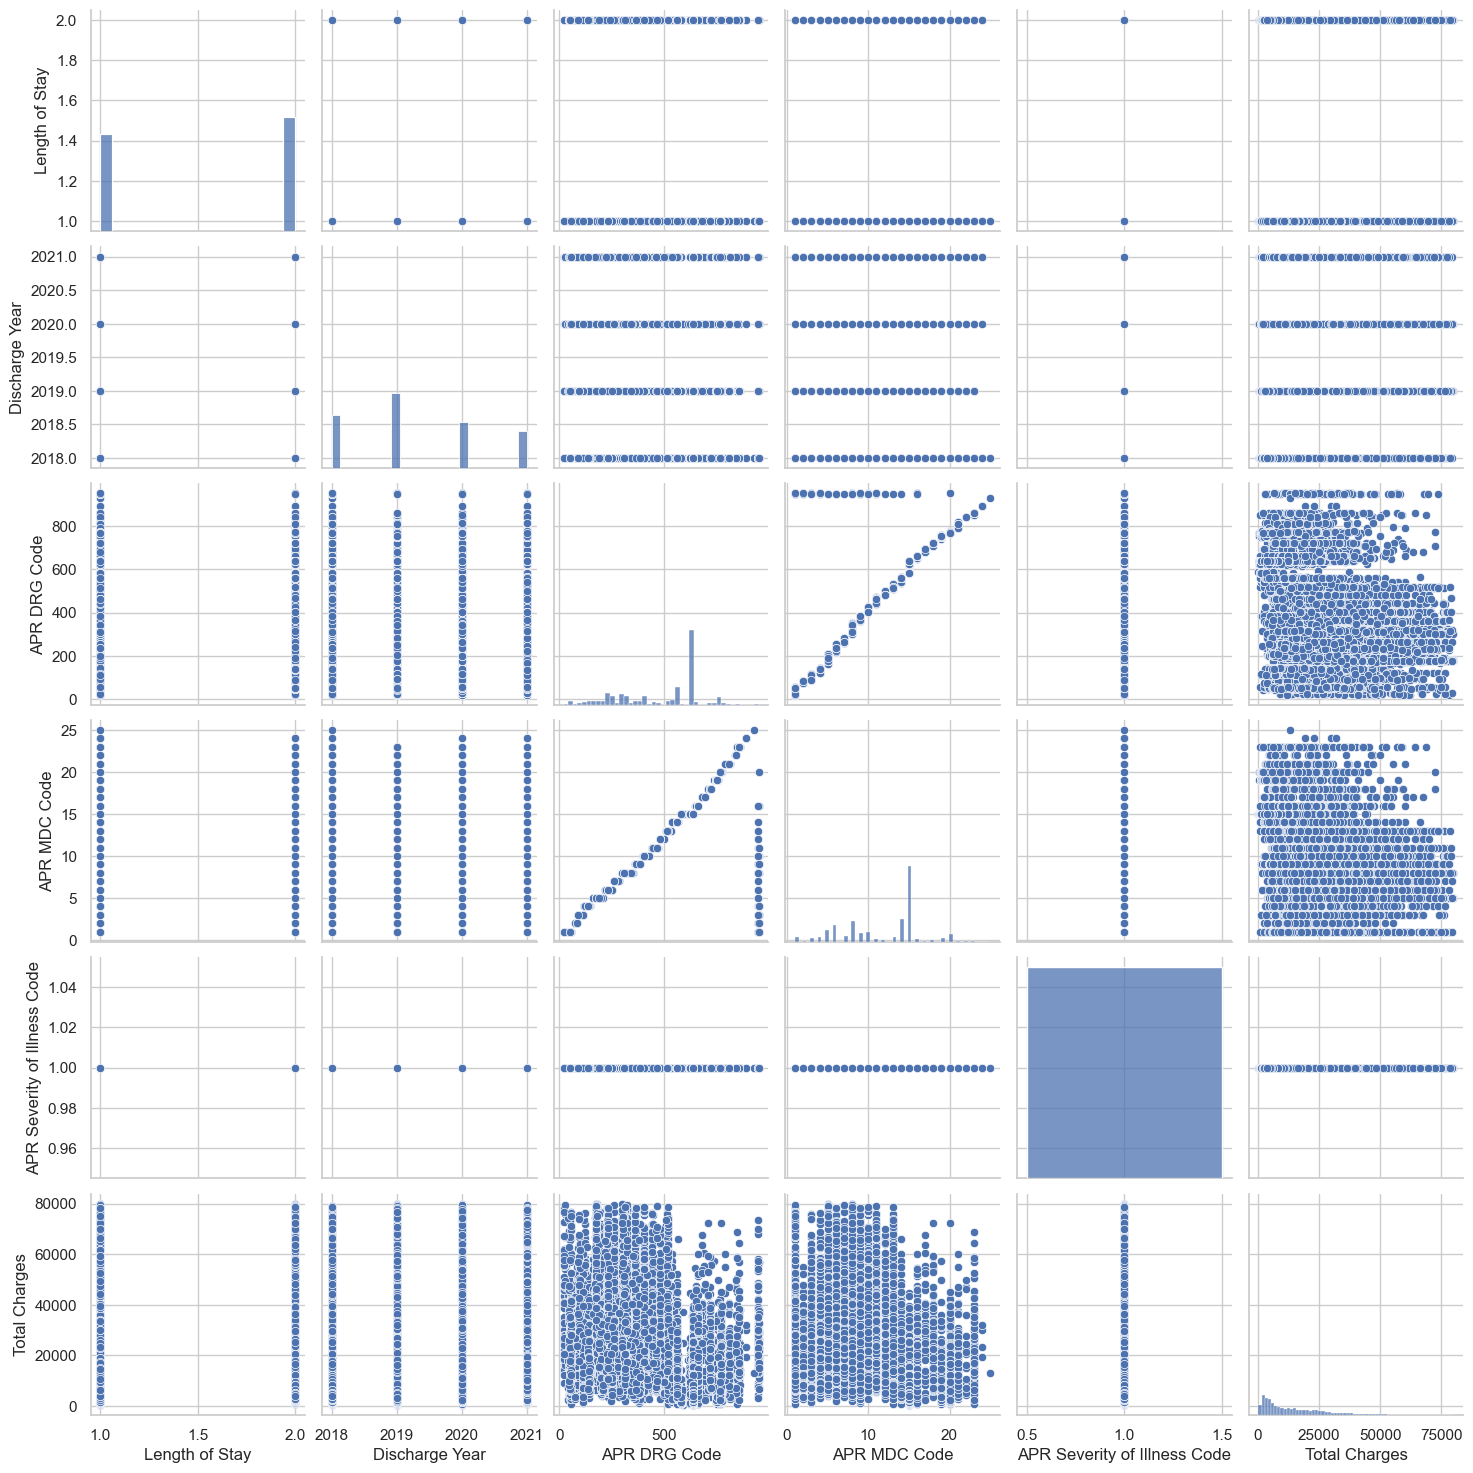

In [110]:
sns.pairplot(filtered_df)
plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/1373128917.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Hospital Service Area", y="Total Charges", data=filtered_df, ci=None)


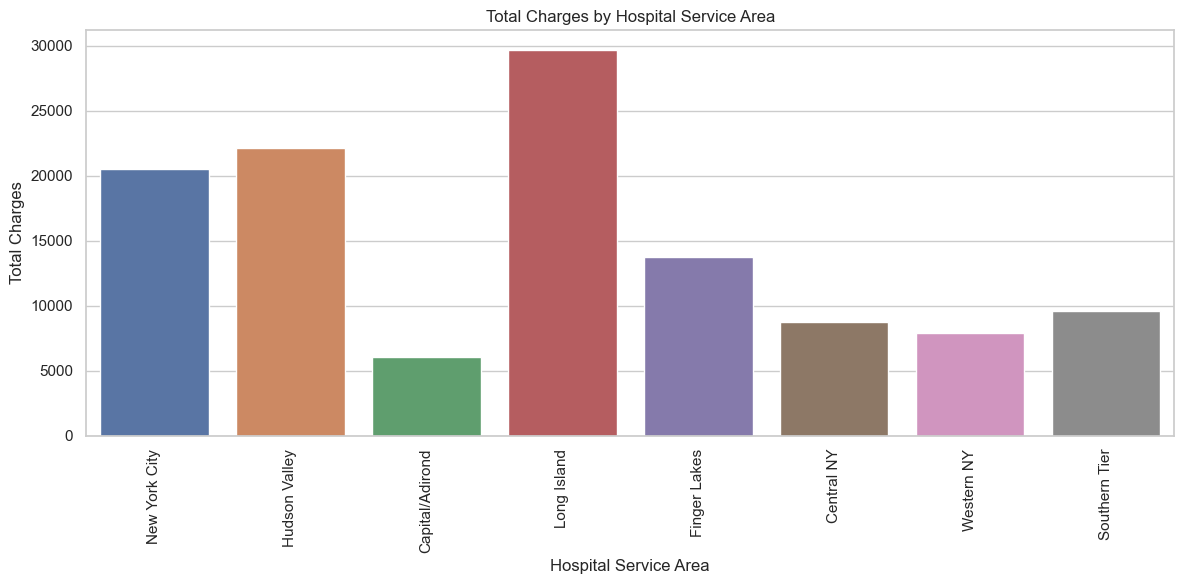

In [111]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x="Hospital Service Area", y="Total Charges", data=filtered_df, ci=None)
plt.xticks(rotation=90)
plt.xlabel("Hospital Service Area")
plt.ylabel("Total Charges")
plt.title("Total Charges by Hospital Service Area")
plt.tight_layout()
plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/2143843016.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Hospital County", y="Total Charges", data=filtered_df, ci=None)


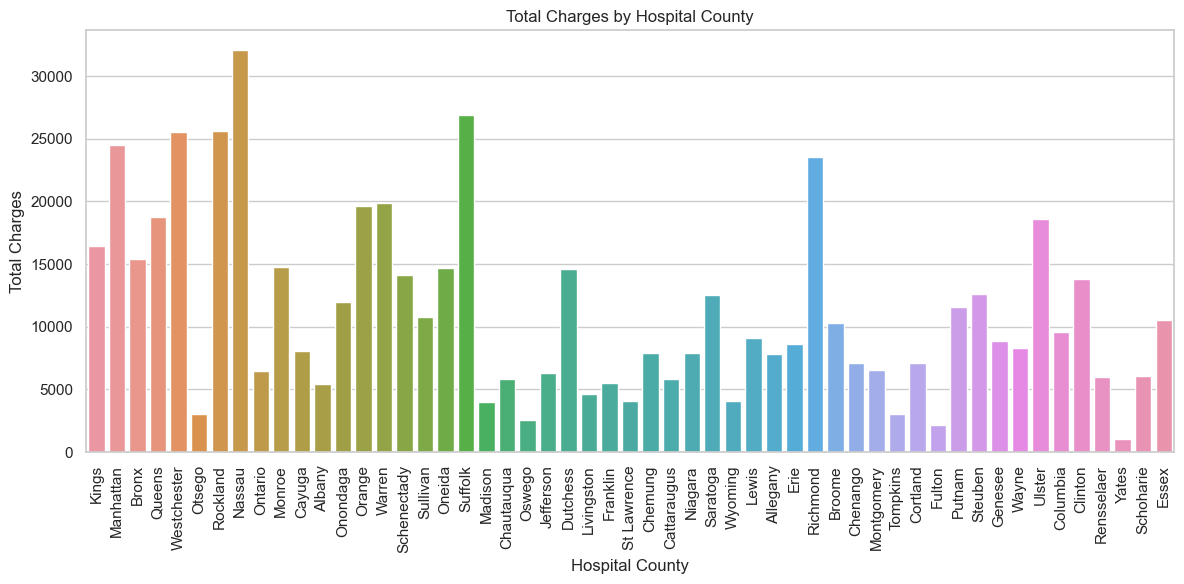

In [112]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.barplot(x="Hospital County", y="Total Charges", data=filtered_df, ci=None)
plt.xticks(rotation=90)
plt.xlabel("Hospital County")
plt.ylabel("Total Charges")
plt.title("Total Charges by Hospital County")
plt.tight_layout()
plt.show()

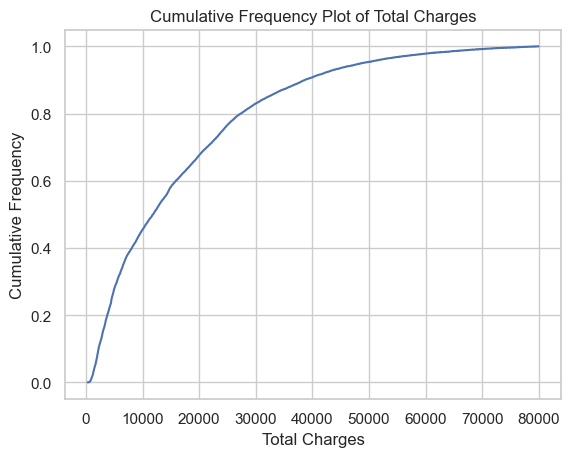

In [113]:
total_charges_sorted = np.sort(filtered_df['Total Charges'])
cumulative_frequency = np.arange(1, len(total_charges_sorted) + 1) / len(total_charges_sorted)

# Create the cumulative frequency plot
plt.step(total_charges_sorted, cumulative_frequency, where='post')

# Customize the plot (optional)
plt.xlabel('Total Charges')
plt.ylabel('Cumulative Frequency')
plt.title('Cumulative Frequency Plot of Total Charges')

# Show the plot
plt.show()

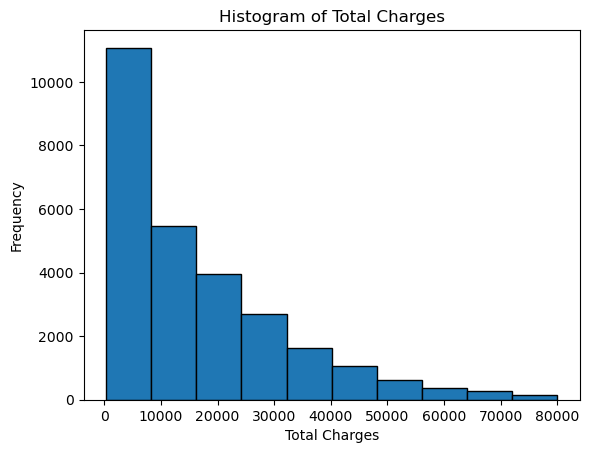

In [30]:
plt.hist(filtered_df['Total Charges'], bins=10, edgecolor='black')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Histogram of Total Charges')
plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/1591771481.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age Group', y='Total Charges', data=filtered_df, ci=None)


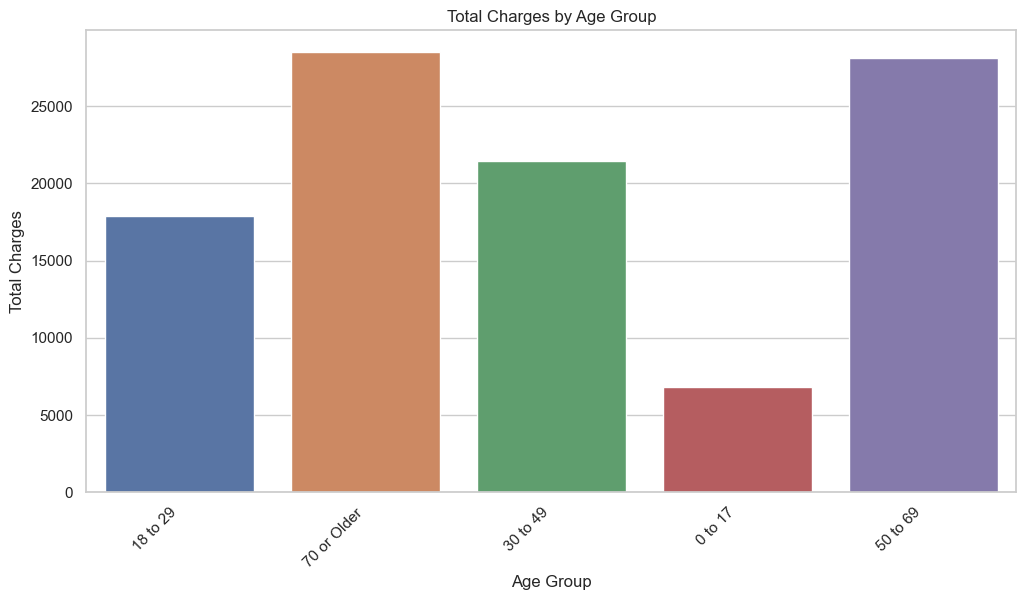

In [115]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

sns.barplot(x='Age Group', y='Total Charges', data=filtered_df, ci=None)
plt.title('Total Charges by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Charges')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/2043485918.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CCSR Diagnosis Code', y='Total Charges', data=filtered_df, ci=None)


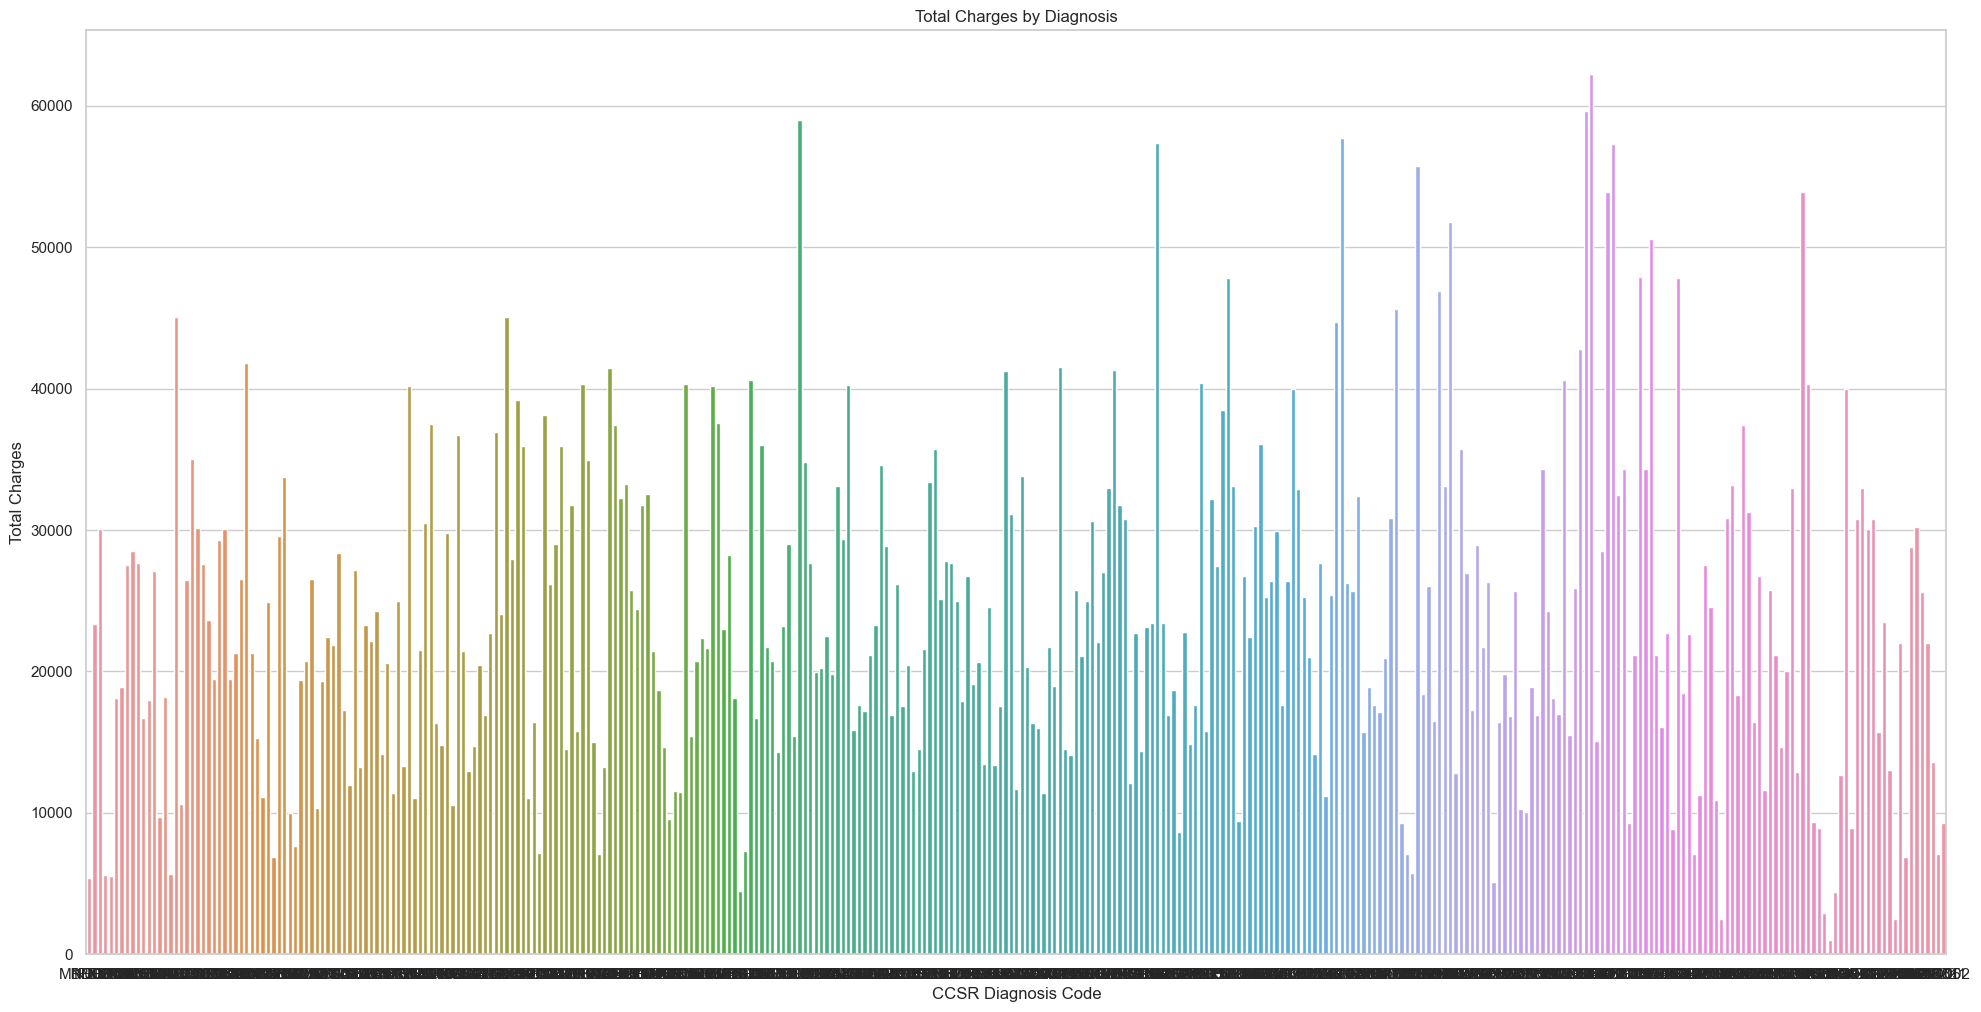

In [116]:
sns.set_style('whitegrid')
plt.figure(figsize=(24, 12))

sns.barplot(x='CCSR Diagnosis Code', y='Total Charges', data=filtered_df, ci=None)
plt.title('Total Charges by Diagnosis')
plt.xlabel('CCSR Diagnosis Code')
plt.ylabel('Total Charges')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/3727853909.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='APR DRG Code', y='Total Charges', data=filtered_df, ci=None)


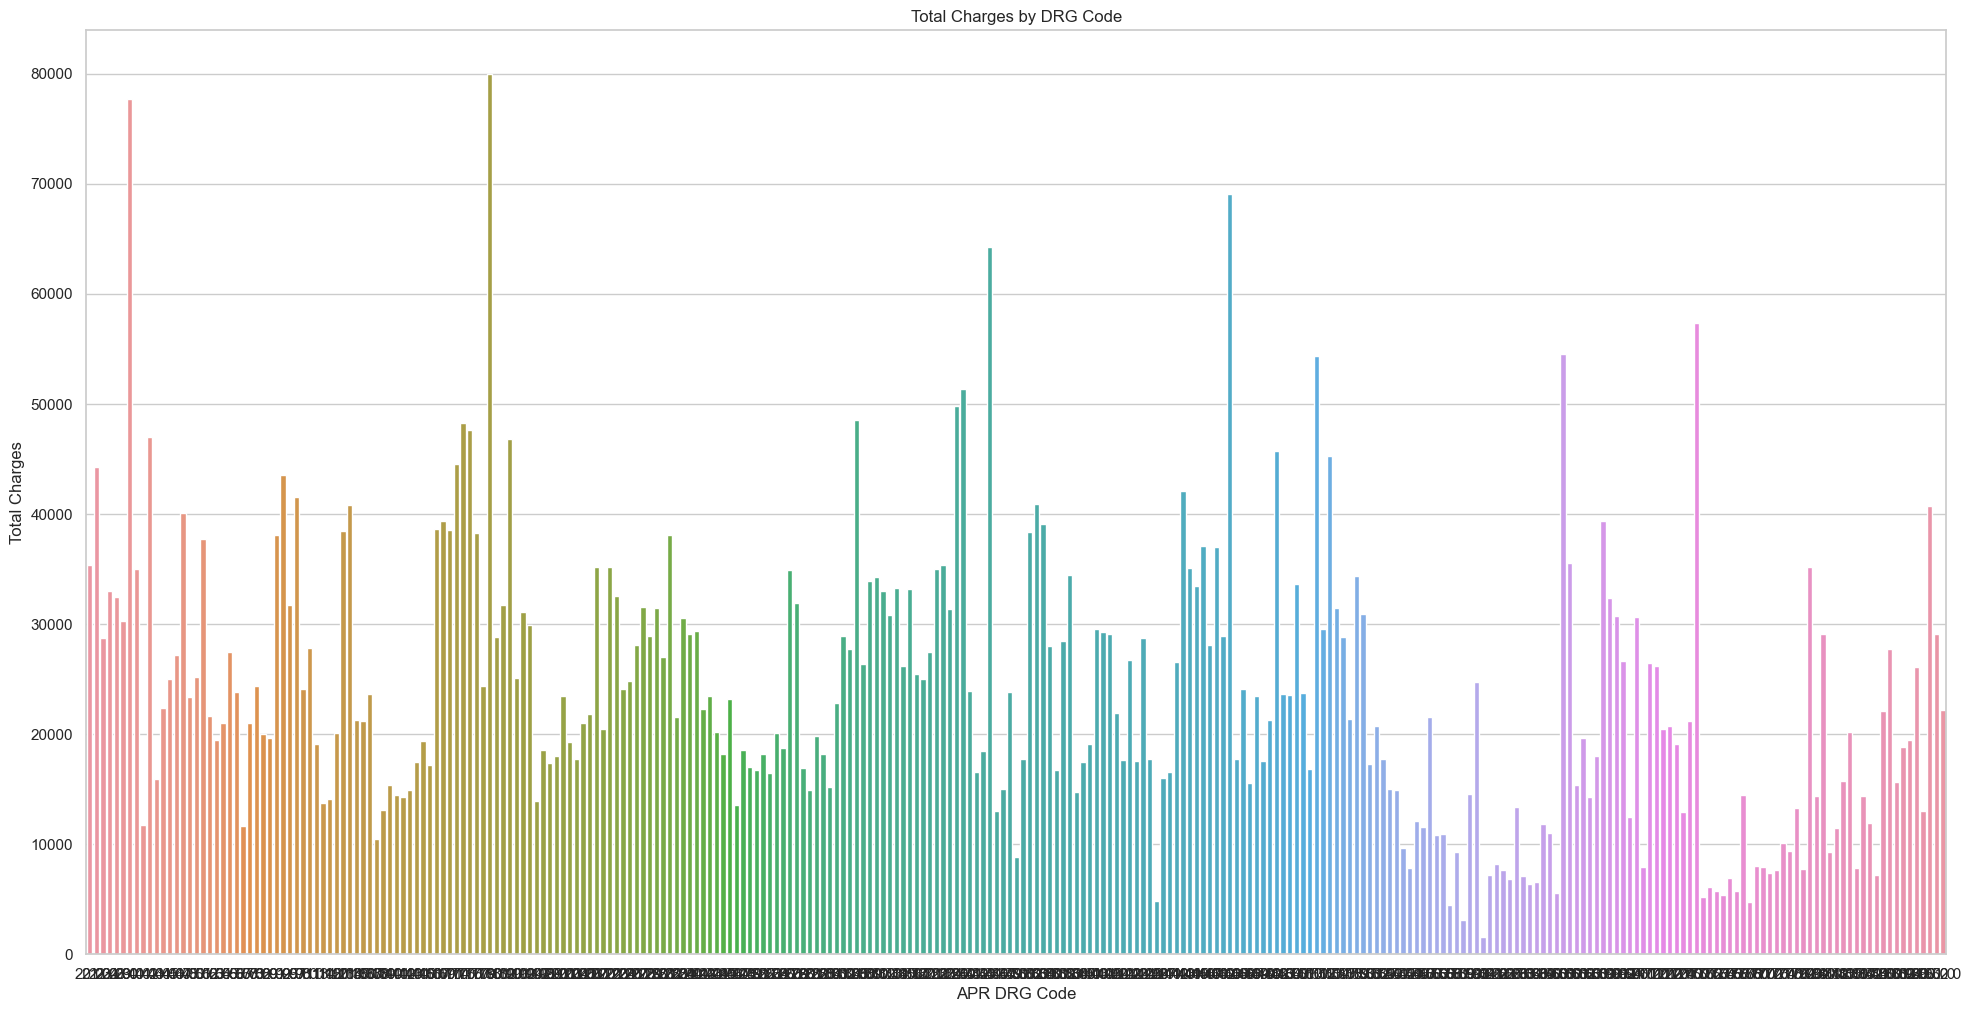

In [117]:
sns.set_style('whitegrid')
plt.figure(figsize=(24, 12))

sns.barplot(x='APR DRG Code', y='Total Charges', data=filtered_df, ci=None)
plt.title('Total Charges by DRG Code')
plt.xlabel('APR DRG Code')
plt.ylabel('Total Charges')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/2112068415.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='APR MDC Code', y='Total Charges', data=filtered_df, ci=None)


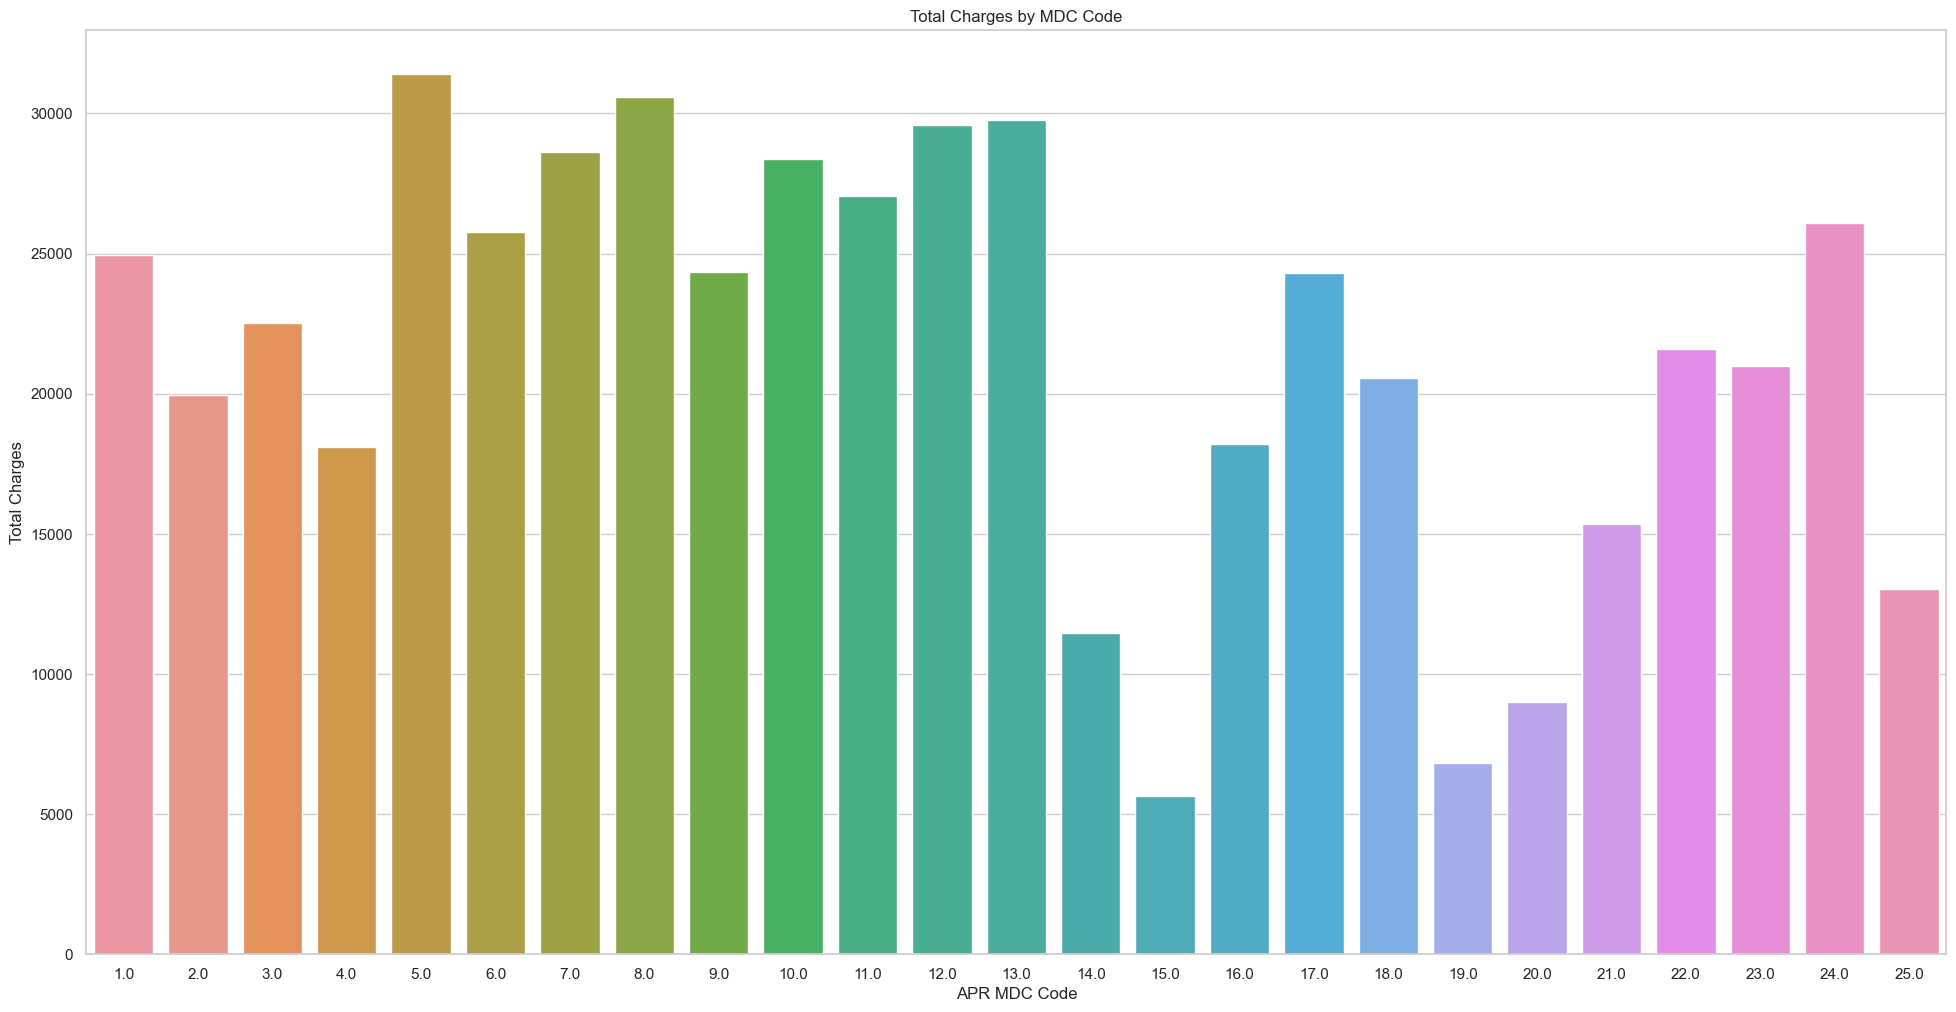

In [118]:
sns.set_style('whitegrid')
plt.figure(figsize=(24, 12))

sns.barplot(x='APR MDC Code', y='Total Charges', data=filtered_df, ci=None)
plt.title('Total Charges by MDC Code')
plt.xlabel('APR MDC Code')
plt.ylabel('Total Charges')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/1750004449.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CCSR Procedure Code', y='Total Charges', data=filtered_df, ci=None)


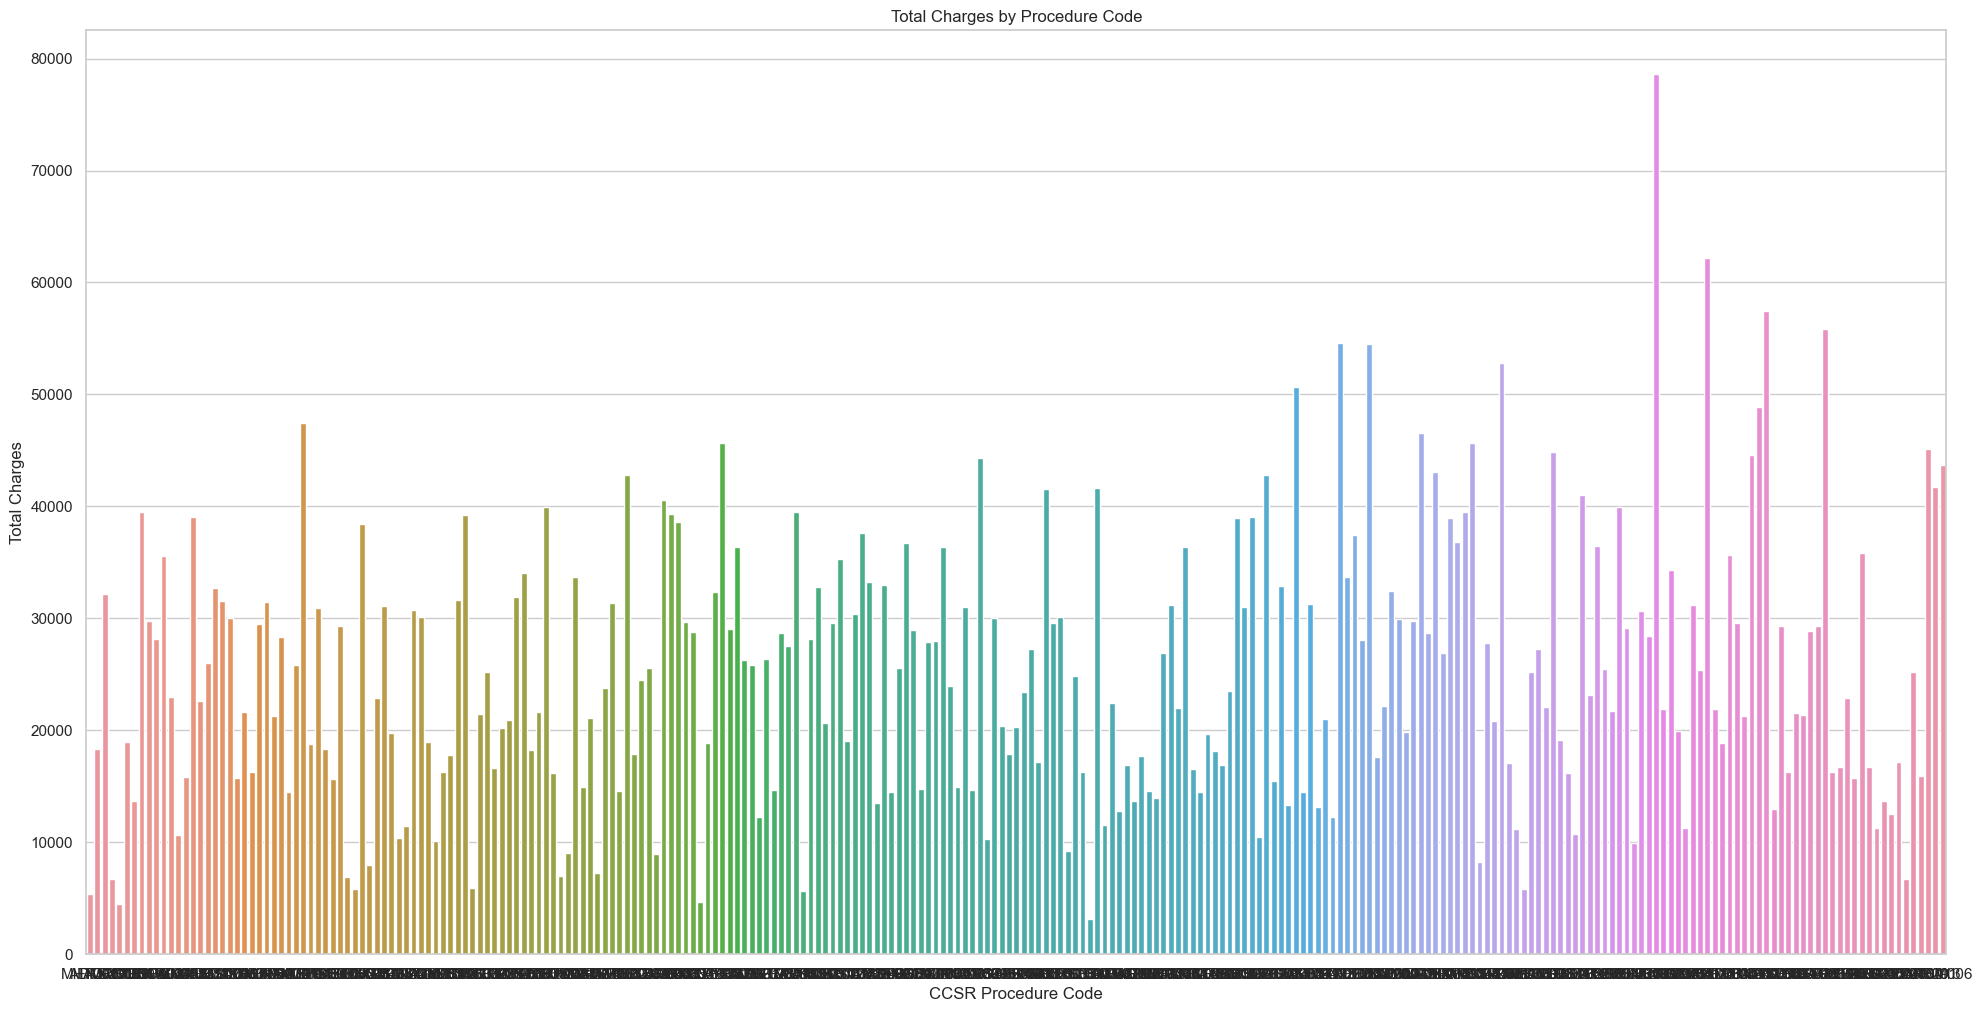

In [119]:
sns.set_style('whitegrid')
plt.figure(figsize=(24, 12))

sns.barplot(x='CCSR Procedure Code', y='Total Charges', data=filtered_df, ci=None)
plt.title('Total Charges by Procedure Code')
plt.xlabel('CCSR Procedure Code')
plt.ylabel('Total Charges')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/2469991793.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Length of Stay', y='Total Charges', data=df, ci=None)


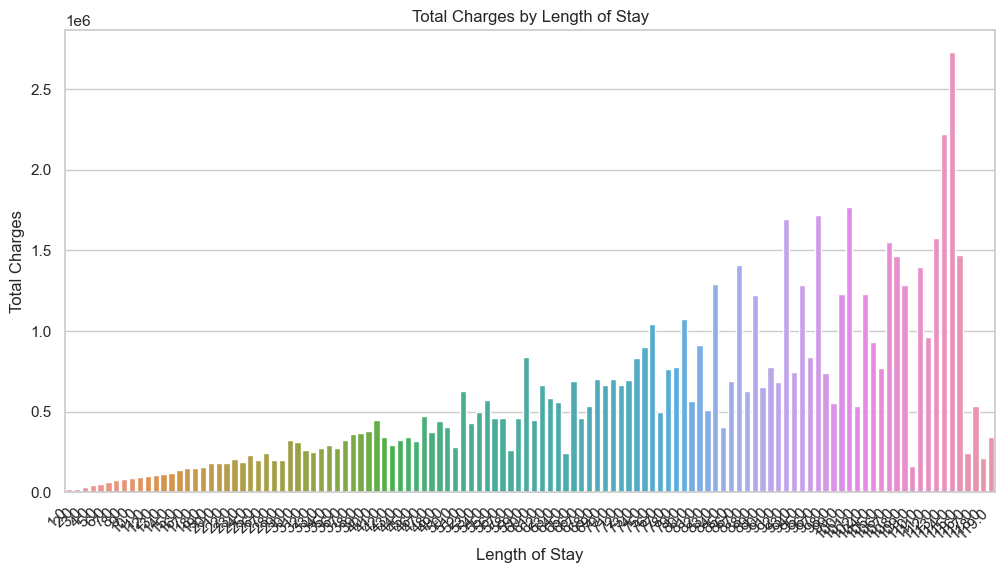

In [120]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

sns.barplot(x='Length of Stay', y='Total Charges', data=df, ci=None)
plt.title('Total Charges by Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Total Charges')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/297393587.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Length of Stay', y='Total Charges', data=filtered_df, ci=None)


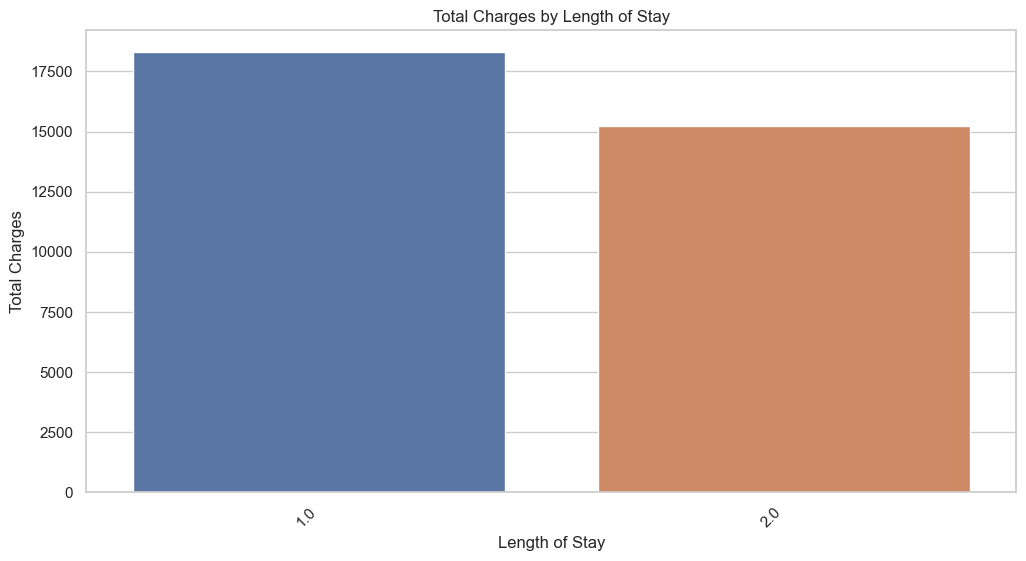

In [121]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

sns.barplot(x='Length of Stay', y='Total Charges', data=filtered_df, ci=None)
plt.title('Total Charges by Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Total Charges')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/3235830443.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Emergency Department Indicator', y='Total Charges', data=filtered_df, ci=None)


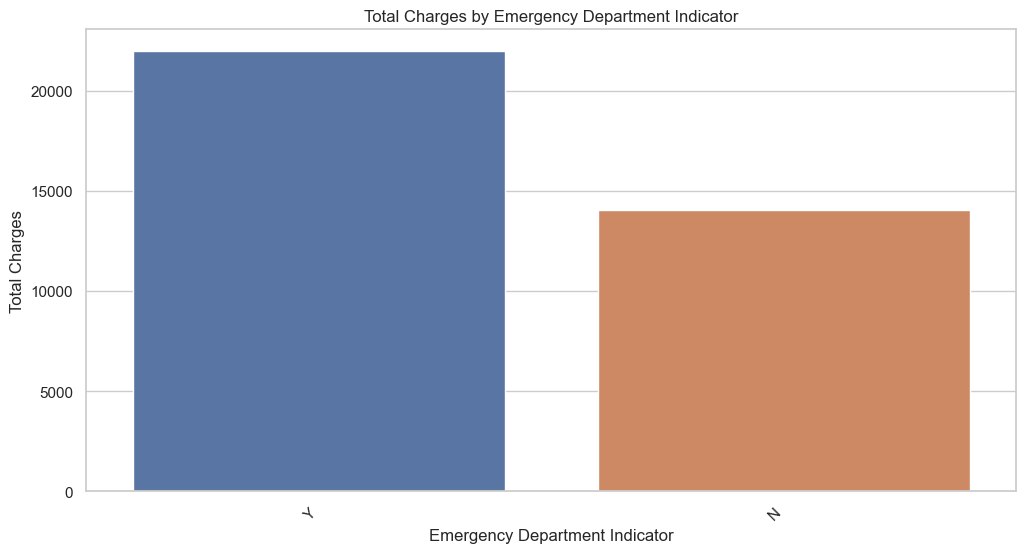

In [122]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

sns.barplot(x='Emergency Department Indicator', y='Total Charges', data=filtered_df, ci=None)
plt.title('Total Charges by Emergency Department Indicator')
plt.xlabel('Emergency Department Indicator')
plt.ylabel('Total Charges')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/323273791.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='APR Risk of Mortality', y='Total Charges', data=filtered_df, ci=None)


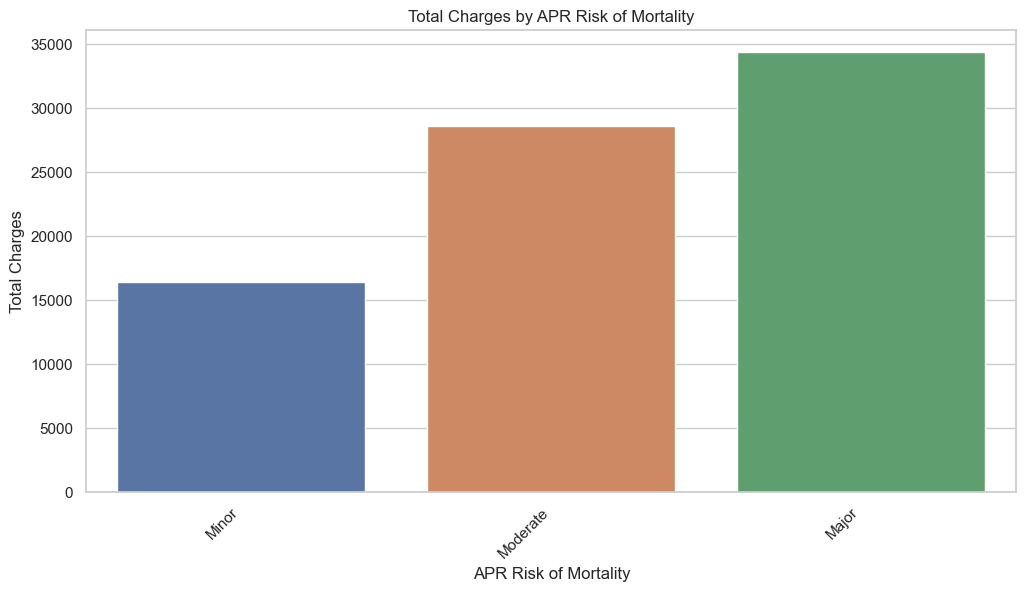

In [123]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

sns.barplot(x='APR Risk of Mortality', y='Total Charges', data=filtered_df, ci=None)
plt.title('Total Charges by APR Risk of Mortality')
plt.xlabel('APR Risk of Mortality')
plt.ylabel('Total Charges')
plt.xticks(rotation=45, ha='right')

plt.show()

/var/folders/16/0z3yvq6x4nlbbx9l11pnfw900000gn/T/ipykernel_4217/796182937.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Type of Admission', y='Total Charges', data=filtered_df, ci=None)


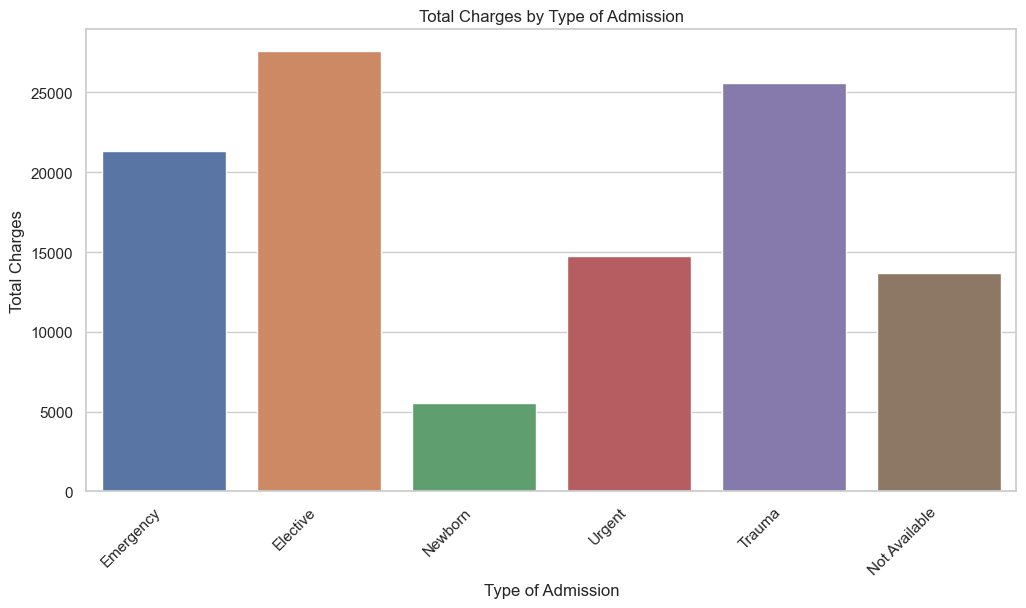

In [124]:
sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

sns.barplot(x='Type of Admission', y='Total Charges', data=filtered_df, ci=None)
plt.title('Total Charges by Type of Admission')
plt.xlabel('Type of Admission')
plt.ylabel('Total Charges')
plt.xticks(rotation=45, ha='right')

plt.show()

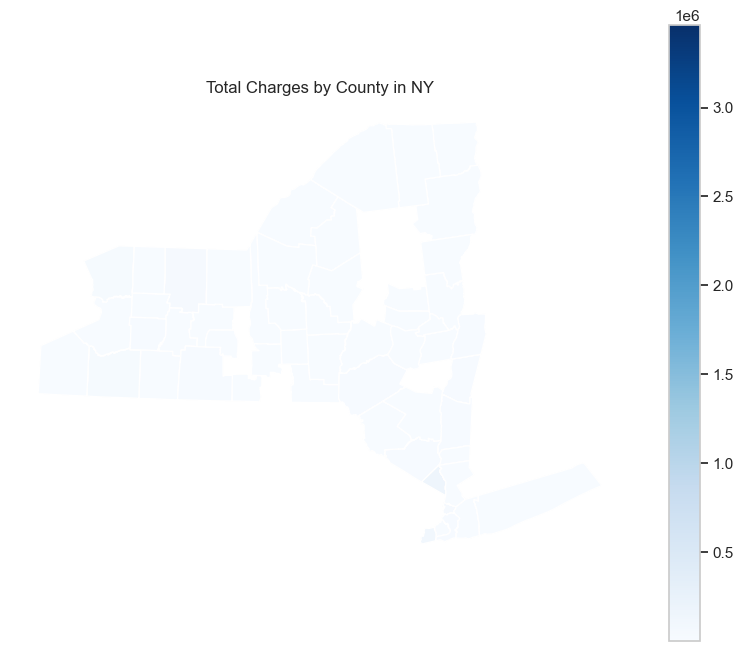

In [127]:
# Replace this with the file path to the shapefile for NY counties
shapefile_path = 'Data/Counties.shp'

# Read the shapefile using geopandas
gdf = gpd.read_file(shapefile_path)

# Merge the data
merged_gdf = gdf.merge(df, left_on='NAME', right_on='Hospital County', how='left')

# Create the map
fig, ax = plt.subplots(figsize=(10, 8))
merged_gdf.plot(ax=ax, column='Total Charges', cmap='Blues', legend=True)

# Customize the plot (optional)
ax.set_title('Total Charges by County in NY')
ax.axis('off')

# Show the map
plt.show()

In [ ]:
### Create viz for SUM and MEDIAN Total Charges, and then plot the county map
# Update coloring